In [2]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

file_path='/content/sample_data/mnist_test.csv'

objects =  tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = objects.load_data()

Mounted at /content/drive
11490434/11490434 [==============================] - 0s 0us/step


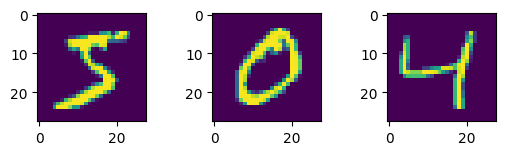

In [4]:

for i in range(3):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(training_images[i])


In [5]:
print(training_images.shape)
print(training_images[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [6]:
training_images  = training_images / 255.0
test_images = test_images / 255.0


In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [9]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2591 - accuracy: 0.9260
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1095 - accuracy: 0.9675
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0748 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0556 - accuracy: 0.9830
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0432 - accuracy: 0.9868


In [10]:

print(model.evaluate(test_images,test_labels))
#print(model.predict(test_images[0]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9769
[0.0804825872182846, 0.9768999814987183]


313/313 [==============================] - 1s 4ms/step
9


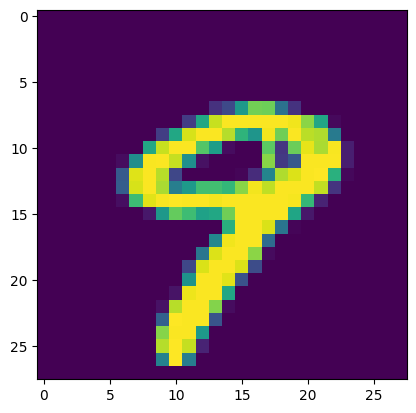

In [12]:
plt.imshow(test_images[9])
prediction=model.predict(test_images)
print(np.argmax(prediction[9]))